In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import lightgbm

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [2]:
# set options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 데이터 확인 및 전처리

In [3]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
print("dataset shape: ", vote_df.shape)
vote_df.sample(10)

dataset shape:  (36425, 78)


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
33971,9241,1.0,716,4.0,1404,5.0,1878,1.0,1474,1.0,1818,1.0,1085,4.0,1144,3.0,1456,5.0,2662,5.0,1619,2.0,2537,5.0,1469,4.0,1336,1.0,631,5.0,899,4.0,1083,1.0,663,5.0,2298,4.0,2500,4.0,2947,30s,3,2,2,Female,1,2,White,Atheist,3,1,3,1,1,2,0,2,5,2,3,0,0,0,0,1,1,0,1,1,1,1,1,0,1,0,1,1
35478,3247,2.0,795,2.0,918,3.0,788,1.0,565,4.0,1003,2.0,854,5.0,401,1.0,759,4.0,1066,4.0,1398,5.0,683,1.0,598,4.0,612,2.0,604,4.0,490,4.0,898,5.0,304,2.0,893,4.0,534,3.0,611,50s,3,1,2,Female,1,2,White,Christian_Catholic,5,6,0,5,5,0,0,6,0,0,2,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6150,30071,2.0,576,1.0,1100,1.0,593,3.0,1189,3.0,980,4.0,1321,2.0,2127,3.0,1657,4.0,2655,3.0,1753,5.0,918,1.0,1859,1.0,2329,5.0,504,2.0,1216,4.0,2410,2.0,1070,2.0,2114,3.0,895,3.0,152,10s,2,2,2,Male,1,1,White,Christian_Catholic,4,2,3,1,2,2,1,5,2,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31500,10192,2.0,2610,5.0,722,5.0,1245,2.0,2643,1.0,2028,1.0,1168,1.0,1436,5.0,2151,1.0,6719,5.0,3204,1.0,2863,5.0,2352,5.0,2433,1.0,1500,5.0,1588,5.0,1453,1.0,462,1.0,1961,2.0,301,5.0,2355,10s,1,2,1,Male,1,1,White,Atheist,6,1,6,0,1,5,6,1,5,6,3,0,1,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1
22232,9581,1.0,911,4.0,1977,1.0,2408,3.0,3081,5.0,1766,5.0,1617,1.0,1219,5.0,1413,2.0,1802,5.0,18854,2.0,3036,4.0,2096,4.0,5010,1.0,1879,4.0,1892,5.0,3894,1.0,1764,1.0,1559,4.0,5518,5.0,1489,20s,3,2,1,Male,3,2,Asian,Atheist,4,2,4,4,2,2,6,4,2,4,3,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
31248,16424,3.0,550,4.0,1484,4.0,981,2.0,1122,1.0,1167,2.0,741,1.0,511,2.0,1354,2.0,1602,4.0,1952,2.0,2610,4.0,1699,3.0,951,1.0,630,5.0,700,1.0,1129,3.0,523,2.0,801,4.0,868,2.0,876,20s,3,1,2,Female,1,1,White,Christian_Protestant,4,2,4,1,1,1,1,2,4,5,2,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1
28140,1592,4.0,452,1.0,584,1.0,254,1.0,561,2.0,1597,2.0,284,1.0,645,2.0,1417,2.0,1194,4.0,120,5.0,560,5.0,1434,2.0,671,2.0,588,2.0,812,1.0,485,2.0,730,3.0,660,5.0,210,1.0,440,10s,3,1,2,Female,1,1,Arab,Christian_Protestant,5,4,2,4,1,0,2,1,1,5,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
21228,5847,3.0,797,1.0,1240,3.0,1952,1.0,969,2.0,1350,1.0,1020,1.0,788,1.0,1319,4.0,1859,4.0,1369,5.0,1926,4.0,1893,1.0,688,4.0,738,3.0,1633,4.0,1397,2.0,697,3.0,1340,3.0,840,1.0,1743,10s,2,1,3,Female,1,1,White,Agnostic,1,3,5,3,0,5,2,1,4,4,2,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
19113,11116,2.0,439,4.0,974,4.0,612,2.0,893,1.0,592,2.0,664,1.0,519,1.0,848,4.0,1132,4.0,886,5.0,631,5.0,881,4.0,262,2.0,372,4.0,713,5.0,630,5.0,580,4.0,684,5.0,627,2.0,796,60s,3,1,3,Female,1,2,White,Agnostic,4,5,1,6,2,2,2,3,2,5,3,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,1,1
16690,14129,1.0,383,2.0,604,2.0,740,1.0,1128,2.0,1109,2.0,814,4.0,758,1.0,1068,3.0,980,4.0,788,4.0,769,5.0,813,2.0,635,2.0,625,3.0,450,5.0,4025,1.0,321,3.0,760,4.0,448,3.0,652,30s,4,2,2,Male,1,1,White,Agnostic,4,1,3,4,1,3,2,2,3,6,3,1,0,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1


<AxesSubplot:>

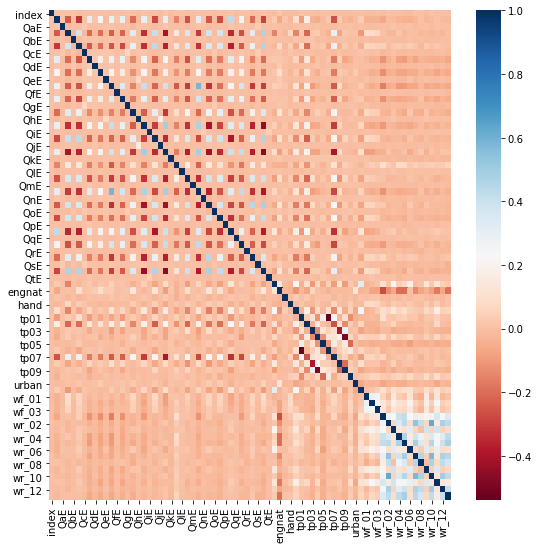

In [4]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = vote_df.corr()
sns.heatmap(corr, cmap="RdBu")

In [5]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36425 entries, 0 to 36424
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       36425 non-null  int64  
 1   QaA         36425 non-null  float64
 2   QaE         36425 non-null  int64  
 3   QbA         36425 non-null  float64
 4   QbE         36425 non-null  int64  
 5   QcA         36425 non-null  float64
 6   QcE         36425 non-null  int64  
 7   QdA         36425 non-null  float64
 8   QdE         36425 non-null  int64  
 9   QeA         36425 non-null  float64
 10  QeE         36425 non-null  int64  
 11  QfA         36425 non-null  float64
 12  QfE         36425 non-null  int64  
 13  QgA         36425 non-null  float64
 14  QgE         36425 non-null  int64  
 15  QhA         36425 non-null  float64
 16  QhE         36425 non-null  int64  
 17  QiA         36425 non-null  float64
 18  QiE         36425 non-null  int64  
 19  QjA         36425 non-nul

In [6]:
vote_df.describe()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.00000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000
mean,22740.586520,2.131942,9.392264e+02,2.897598,2.053925e+03,3.661414,1461.583775,1.750748,1.499025e+03,2.320494,1.897114e+03,2.167742,1.911749e+03,2.560220,1.287380e+03,2.316047,2.243674e+03,3.166699,3.508262e+03,3.574084,2.647131e+03,3.822704,1.910627e+03,4.330734,4.253209e+03,3.509979,1.665842e+03,2.635772,956.472258,3.213672,1410.536884,3.067756,1.632666e+03,2.842169,1.114106e+03,2.827948,2.632989e+03,3.431187,1.163574e+03,3.224104,2.059381e+03,2.548250,1.272752,2.621002,1.170487,1.387975,3.018174,2.61930,1.755717,3.025614,1.333342,2.462759,2.022704,3.509952,2.272340,4.317968,2.179574,0.453178,0.080494,0.163294,0.118600,0.709623,0.934468,0.208730,0.868717,0.895072,0.329087,0.938888,0.971613,0.202663,0.945532,0.393988,0.947536,0.926781
std,13118.110333,1.199763,1.372469e+04,1.568342,1.984665e+04,1.431303,8097.443081,1.046655,1.109992e+04,1.370584,1.508537e+04,1.349821,8.217648e+04,1.509689,9.914887e+03,1.460773,1.373760e+04,1.482101,9.409606e+04,1.360288,6.022463e+04,1.368946,2.086329e+04,1.144399,4.095916e+05,1.375125,2.834511e+04,1.475278,5753.950736,1.478189,8745.676887,1.492889,2.626450e+04,1.405662,2.285452e+04,1.426399,1.657403e+05,1.374757,7.501528e+03,1.522649,4.413002e+04,0.941273,0.449247,5.438894,0.468163,0.640297,2.005182,1.89422,1.676886,2.036558,1.451165,1.998749,1.779602,1.971593,1.845983,1.724866,0.761658,0.497810,0.272060,0.369639,0.323322,0.453943,0.247465,0.406407,0.337715,0.306465,0.469888,0.239539,0.166078,0.401989,0.226942,0.488639,0.222964,0.260499
min,0.000000,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11403.000000,1.000000,4.040000e+02,1.000000,8.760000e+02,2.000000,651.000000,1.000000,6.810000e+02,1.000000,8.360000e+02,1.000000,5.050000e+02,1.000000,5.490000e+02,1.000000,1.081000e+03,2.000000,1.257000e+03,2.000000,9.040000e+02,3.000000,8.600000e+02,4.000000,8.060000e+02,2.000000,6.510000e+02,1.000000,430.000000,2.000000,638.000000,2.000000,7.050000e+02,2.000000,4.620000e+02,2.000000,7.950000e+02,2.000000,5.290000e+0

In [7]:
# 불균형 분포인지 확인
print(vote_df['voted'].value_counts())
unsatisfied_cnt = vote_df[vote_df['voted'] == 1].voted.count()
total_cnt = vote_df.voted.count()
print("unsatisfied 비율은 {0:.2f}".format(unsatisfied_cnt / total_cnt))

0    19918
1    16507
Name: voted, dtype: int64
unsatisfied 비율은 0.45


선거 투표 여부
- 0 = No
- 1 = Yes

In [8]:
# NA값 확인
print(vote_df.isna().sum())

index         0
QaA           0
QaE           0
QbA           0
QbE           0
QcA           0
QcE           0
QdA           0
QdE           0
QeA           0
QeE           0
QfA           0
QfE           0
QgA           0
QgE           0
QhA           0
QhE           0
QiA           0
QiE           0
QjA           0
QjE           0
QkA           0
QkE           0
QlA           0
QlE           0
QmA           0
QmE           0
QnA           0
QnE           0
QoA           0
QoE           0
QpA           0
QpE           0
QqA           0
QqE           0
QrA           0
QrE           0
QsA           0
QsE           0
QtA           0
QtE           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
tp01          0
tp02          0
tp03          0
tp04          0
tp05          0
tp06          0
tp07          0
tp08          0
tp09          0
tp10          0
urban         0
voted         0
wf_01   

In [23]:
# 예측한 값으로 성능을 평가하는 함수
def get_clf_eval(y_test, pred=None):
    confusion = confusion_matrix(y_test, pred) # 오차 행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # F1
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC-AUC
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 결손값 처리

In [9]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['education', 'engnat', 'hand', 'urban']
for i in range(97, 117):  # 질문을 답할 때까지의 시간
    s = 'Q' + chr(i) + 'E'
    zero_features.append(s)

# 전체 데이터 건수
total_count = vote_df['education'].count()
print("전체 데이터 건수는 ", total_count)
print()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고 퍼센트 계산
for feature in zero_features:
    zero_count = vote_df[vote_df[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))
print()
    
# tp 범위 검사
tp_features = []
for i in range(1, 11):
    s = 'tp' + chr(48+(i//10)) + chr(48+(i%10))
    tp_features.append(s)
    
# 피처별로 반복하면서 데이터 값이 01~07을 벗어난 데이터 건수 추출하고 퍼센트 계산
for feature in tp_features:
    cnt = vote_df[vote_df[feature] < 1][feature].count() + vote_df[vote_df[feature] > 7][feature].count()
    print('{0} 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, cnt, 100*cnt/total_count))
print()

print("value > 7\tvalue == 7\tvalue < 0")
for feature in tp_features:
    cnt1 = vote_df[vote_df[feature] > 7][feature].count()
    cnt2 = vote_df[vote_df[feature] == 0][feature].count() # tp__ 데이터 결손값이 모두 0임을 확인
    cnt3 = vote_df[vote_df[feature] < 0][feature].count()
    print("%d\t\t%d\t\t%d" % (cnt1, cnt2, cnt3))
    
zero_features = zero_features + tp_features


전체 데이터 건수는  36425

education 0 건수는 432, 퍼센트는 1.19 %
engnat 0 건수는 63, 퍼센트는 0.17 %
hand 0 건수는 135, 퍼센트는 0.37 %
urban 0 건수는 258, 퍼센트는 0.71 %
QaE 0 건수는 0, 퍼센트는 0.00 %
QbE 0 건수는 0, 퍼센트는 0.00 %
QcE 0 건수는 0, 퍼센트는 0.00 %
QdE 0 건수는 0, 퍼센트는 0.00 %
QeE 0 건수는 0, 퍼센트는 0.00 %
QfE 0 건수는 0, 퍼센트는 0.00 %
QgE 0 건수는 0, 퍼센트는 0.00 %
QhE 0 건수는 1, 퍼센트는 0.00 %
QiE 0 건수는 1, 퍼센트는 0.00 %
QjE 0 건수는 1, 퍼센트는 0.00 %
QkE 0 건수는 2, 퍼센트는 0.01 %
QlE 0 건수는 0, 퍼센트는 0.00 %
QmE 0 건수는 0, 퍼센트는 0.00 %
QnE 0 건수는 0, 퍼센트는 0.00 %
QoE 0 건수는 0, 퍼센트는 0.00 %
QpE 0 건수는 1, 퍼센트는 0.00 %
QqE 0 건수는 1, 퍼센트는 0.00 %
QrE 0 건수는 0, 퍼센트는 0.00 %
QsE 0 건수는 0, 퍼센트는 0.00 %
QtE 0 건수는 0, 퍼센트는 0.00 %

tp01 건수는 3822, 퍼센트는 10.49 %
tp02 건수는 4356, 퍼센트는 11.96 %
tp03 건수는 9348, 퍼센트는 25.66 %
tp04 건수는 4414, 퍼센트는 12.12 %
tp05 건수는 12682, 퍼센트는 34.82 %
tp06 건수는 7148, 퍼센트는 19.62 %
tp07 건수는 7858, 퍼센트는 21.57 %
tp08 건수는 2547, 퍼센트는 6.99 %
tp09 건수는 7027, 퍼센트는 19.29 %
tp10 건수는 1158, 퍼센트는 3.18 %

value > 7	value == 7	value < 0
0		3822		0
0		4356		0
0		9348		0
0		4414		0
0		126

In [10]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
vote_df[zero_features] = vote_df[zero_features].replace(0, vote_df[zero_features].mean())

### 이상값 처리

<AxesSubplot:>

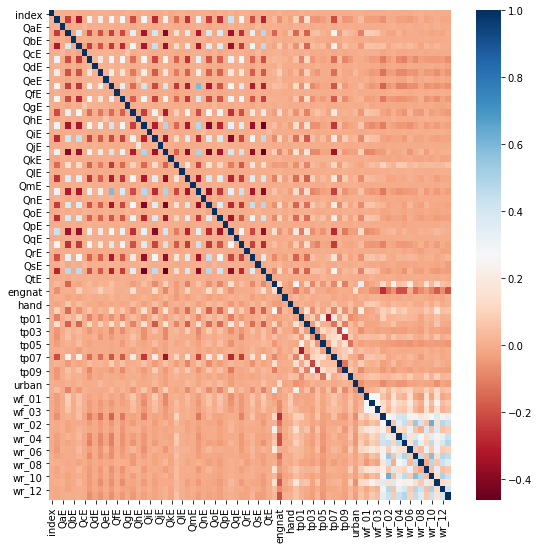

In [11]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = vote_df.corr()
sns.heatmap(corr, cmap="RdBu")

In [16]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df["tp07"]==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값보다 크거나, 최소값보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [25]:
outlier_index = get_outlier(df=vote_df, column="QjE", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)
print("이상치 데이터 인덱스 개수:", len(outlier_index))

outlier_index = get_outlier(df=vote_df, column="QkE", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)
print("이상치 데이터 인덱스 개수:", len(outlier_index))

outlier_index = get_outlier(df=vote_df, column="wr_12", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)
print("이상치 데이터 인덱스 개수:", len(outlier_index))

이상치 데이터 인덱스: Int64Index([   11,   168,   262,   277,   312,   401,   409,   426,   456,
              465,
            ...
            36077, 36150, 36155, 36202, 36205, 36322, 36352, 36370, 36392,
            36393],
           dtype='int64', length=871)
이상치 데이터 인덱스 개수: 871
이상치 데이터 인덱스: Int64Index([    1,   103,   111,   191,   253,   291,   312,   319,   328,
              384,
            ...
            35694, 35934, 36042, 36063, 36129, 36150, 36199, 36205, 36244,
            36274],
           dtype='int64', length=743)
이상치 데이터 인덱스 개수: 743
이상치 데이터 인덱스: Int64Index([  119,   149,   291,   407,   430,   564,   589,   593,   734,
              756,
            ...
            35449, 35513, 35520, 35581, 36118, 36122, 36194, 36336, 36356,
            36400],
           dtype='int64', length=507)
이상치 데이터 인덱스 개수: 507
